# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5

In [3]:
profile.head()

age  became_member_on gender                                id    income
0  118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783       NaN
1   55          20170715      F  0610b486422d4921ae7d2bf64640c50b  112000.0
2  118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5       NaN
3   75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef  100000.0
4  118          20170804   None  a03223e636434f42ac4c3df47e8bac43       NaN

In [4]:
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}

In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [6]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [7]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [8]:
portfolio.shape

(10, 6)

In [9]:
profile.shape

(17000, 5)

In [10]:
transcript.shape


(306534, 4)

### 3) Data Preparation

In [11]:
portfolio.head()

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5

each channel can be in a seprate column instead of putting them all togethe

In [12]:
#extract all channels names 

channels_set = set()
for i in portfolio.channels:
    channels_set.update(set(i))
channels_set

{'email', 'mobile', 'social', 'web'}

In [13]:
# split the channel into different attribute
for i in channels_set:
    portfolio[i] = portfolio.channels.apply(lambda x: i in x).map({True:1, False: 0})
portfolio.head()

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   

                                 id     offer_type  reward  web  email  \
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10    0      1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10    1      1   
2  3f207df678b143eea3cee63160fa8bed  informational       0    1      1   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5    1      1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5    1      1   

   mobile  social  
0       1       1  
1       1       1  
2       1       0  
3       1       0  
4       0       0

In [14]:
# Now drop the 'channels' column 
portfolio = portfolio.drop('channels', axis=1)
portfolio

difficulty  duration                                id     offer_type  \
0          10         7  ae264e3637204a6fb9bb56bc8210ddfd           bogo   
1          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo   
2           0         4  3f207df678b143eea3cee63160fa8bed  informational   
3           5         7  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo   
4          20        10  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount   
5           7         7  2298d6c36e964ae4a3e7e9706d1fb8c2       discount   
6          10        10  fafdcd668e3743c1bb461111dcafc2a4       discount   
7           0         3  5a8bc65990b245e5a138643cd4eb9837  informational   
8           5         5  f19421c1d4aa40978ebb69ca19b0e20d           bogo   
9          10         7  2906b810c7d4411798c6938adc9daaa5       discount   

   reward  web  email  mobile  social  
0      10    0      1       1       1  
1      10    1      1       1       1  
2       0    1      1       1       0  
3       5    1      1       1       0  
4       5    1      1       0       0  
5       3    1      1       1       1  
6       2    1      1       1       1  
7       0    0      1       1       1  
8       5    1      1       1       1  
9       2    1      1       1       0

In [15]:
profile

age  became_member_on gender                                id  \
0      118          20170212   None  68be06ca386d4c31939f3a4f0e3dd783   
1       55          20170715      F  0610b486422d4921ae7d2bf64640c50b   
2      118          20180712   None  38fe809add3b4fcf9315a9694bb96ff5   
3       75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef   
4      118          20170804   None  a03223e636434f42ac4c3df47e8bac43   
5       68          20180426      M  e2127556f4f64592b11af22de27a7932   
6      118          20170925   None  8ec6ce2a7e7949b1bf142def7d0e0586   
7      118          20171002   None  68617ca6246f4fbc85e91a2a49552598   
8       65          20180209      M  389bc3fa690240e798340f5a15918d5c   
9      118          20161122   None  8974fc5686fe429db53ddde067b88302   
10     118          20170824   None  c4863c7985cf408faee930f111475da3   
11     118          20150919   None  148adfcaa27d485b82f323aaaad036bd   
12      58          20171111      M  2eeac8d8feae4a8cad5a6af0499a211d   
13      61          20170911      F  aa4862eba776480b8bb9c68455b8c2e1   
14      26          20140213      M  e12aeaf2d47d42479ea1c4ac3d8286c6   
15      62          20160211      F  31dda685af34476cad5bc968bdb01c53   
16      49          20141113      M  62cf5e10845442329191fc246e7bcea3   
17     118          20170801   None  744d603ef08c4f33af5a61c8c7628d1c   
18      57          20171231      M  6445de3b47274c759400cd68131d91b4   
19      61          20180501      F  a448667f336b42c9a66fc5ffd5d73772   
20      40          20160504      F  440cf1fd7580490c971d8c651ed962af   
21      64          20170909      M  4b0da7e80e5945209a1fdddfe813dbe0   
22      78          20170616      F  c27e0d6ab72c455a8bb66d980963de60   
23     118          20170907   None  2b826eba31074a059d63b0ae8f50b7d5   
24      42          20130811      M  f806632c011441378d4646567f357a21   
25      56          20180428      F  d058f73bf8674a26a95227db098147b1   
26     118          20170330   None  65aba5c617294649aeb624da249e1ee5   
27      33          20170926      F  c6c9884912c645429f3333f912b55f44   
28      46          20170911      F  7429a044884842d6862f516c38b1156f   
29      59          20150121      M  ebe7ef46ea6f4963a7dd49f501b26779   
...    ...               ...    ...                               ...   
16970   67          20151107      M  a2e6029e17b6466187a40b66e333a73e   
16971   52          20180522      F  6e71b66784844d1ab8376ac8ab096d4b   
16972   44          20170119      F  e2fd53ed790240c586b3188f23542cca   
16973   30          20151012      M  08eb126ad33f447ca3ad076482445c05   
16974   59          20160113      F  f88e91a11d8f405b9a47ad3741415b83   
16975   61          20171231      F  1b4df4b48bf64727a4c445909aea1251   
16976   39          20160921      F  122c0c2a3c2540848f8c3fdc37e97639   
16977  118          20160609   None  eb7dd979f4644052a5c401a01f129132   
16978   29          20170220      F  54bead4179c44b71acc4e8398181d183   
16979   63          20130922      F  a00058cf10334a308c68e7631c529907   
16980  118          20160901   None  5c686d09ca4d475a8f750f2ba07e0440   
16981   84          20160629      M  1966fa40d2f84620b2b1b9b64f8e0209   
16982  118          20160415   None  d9ca82f550ac4ee58b6299cf1e5c824a   
16983   72          20150404      F  ff737c250d2343729ade04c4f6eb1001   
16984   75          20160716      F  392d23b2c958493197f647bedfe4f418   
16985   26          20180619      M  97ee6e7a12fe4064b260fa48bdd0330f   
16986   59          20170731      F  bf3069b178fe40d789dd027901bc406b   
16987   57          20160709      M  76ddbd6576844afe811f1a3c0fbb5bec   
16988   64          20180104      M  f653cf2d8bba42d0a53c2937ee2e5893   
16989  118          20180305   None  ca45ee1883624304bac1e4c8a114f045   
16990   70          20160310      F  79edb810789c447e8d212a324b44cc16   
16991  118          20160116   None  a9a20fa8b5504360beb4e7c8712f8306   
16992   21          20170917      F  400d0536e8794cbb855b0d882d67

In [16]:

profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [17]:

#num of nan and none#num of  
profile.isna().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [18]:
profile['gender'].fillna('NA', inplace=True)
profile['income'].fillna((profile['income'].mean()), inplace=True)

In [19]:
profile.isna().sum()

age                 0
became_member_on    0
gender              0
id                  0
income              0
dtype: int64

In [20]:

profile

age  became_member_on gender                                id  \
0      118          20170212     NA  68be06ca386d4c31939f3a4f0e3dd783   
1       55          20170715      F  0610b486422d4921ae7d2bf64640c50b   
2      118          20180712     NA  38fe809add3b4fcf9315a9694bb96ff5   
3       75          20170509      F  78afa995795e4d85b5d9ceeca43f5fef   
4      118          20170804     NA  a03223e636434f42ac4c3df47e8bac43   
5       68          20180426      M  e2127556f4f64592b11af22de27a7932   
6      118          20170925     NA  8ec6ce2a7e7949b1bf142def7d0e0586   
7      118          20171002     NA  68617ca6246f4fbc85e91a2a49552598   
8       65          20180209      M  389bc3fa690240e798340f5a15918d5c   
9      118          20161122     NA  8974fc5686fe429db53ddde067b88302   
10     118          20170824     NA  c4863c7985cf408faee930f111475da3   
11     118          20150919     NA  148adfcaa27d485b82f323aaaad036bd   
12      58          20171111      M  2eeac8d8feae4a8cad5a6af0499a211d   
13      61          20170911      F  aa4862eba776480b8bb9c68455b8c2e1   
14      26          20140213      M  e12aeaf2d47d42479ea1c4ac3d8286c6   
15      62          20160211      F  31dda685af34476cad5bc968bdb01c53   
16      49          20141113      M  62cf5e10845442329191fc246e7bcea3   
17     118          20170801     NA  744d603ef08c4f33af5a61c8c7628d1c   
18      57          20171231      M  6445de3b47274c759400cd68131d91b4   
19      61          20180501      F  a448667f336b42c9a66fc5ffd5d73772   
20      40          20160504      F  440cf1fd7580490c971d8c651ed962af   
21      64          20170909      M  4b0da7e80e5945209a1fdddfe813dbe0   
22      78          20170616      F  c27e0d6ab72c455a8bb66d980963de60   
23     118          20170907     NA  2b826eba31074a059d63b0ae8f50b7d5   
24      42          20130811      M  f806632c011441378d4646567f357a21   
25      56          20180428      F  d058f73bf8674a26a95227db098147b1   
26     118          20170330     NA  65aba5c617294649aeb624da249e1ee5   
27      33          20170926      F  c6c9884912c645429f3333f912b55f44   
28      46          20170911      F  7429a044884842d6862f516c38b1156f   
29      59          20150121      M  ebe7ef46ea6f4963a7dd49f501b26779   
...    ...               ...    ...                               ...   
16970   67          20151107      M  a2e6029e17b6466187a40b66e333a73e   
16971   52          20180522      F  6e71b66784844d1ab8376ac8ab096d4b   
16972   44          20170119      F  e2fd53ed790240c586b3188f23542cca   
16973   30          20151012      M  08eb126ad33f447ca3ad076482445c05   
16974   59          20160113      F  f88e91a11d8f405b9a47ad3741415b83   
16975   61          20171231      F  1b4df4b48bf64727a4c445909aea1251   
16976   39          20160921      F  122c0c2a3c2540848f8c3fdc37e97639   
16977  118          20160609     NA  eb7dd979f4644052a5c401a01f129132   
16978   29          20170220      F  54bead4179c44b71acc4e8398181d183   
16979   63          20130922      F  a00058cf10334a308c68e7631c529907   
16980  118          20160901     NA  5c686d09ca4d475a8f750f2ba07e0440   
16981   84          20160629      M  1966fa40d2f84620b2b1b9b64f8e0209   
16982  118          20160415     NA  d9ca82f550ac4ee58b6299cf1e5c824a   
16983   72          20150404      F  ff737c250d2343729ade04c4f6eb1001   
16984   75          20160716      F  392d23b2c958493197f647bedfe4f418   
16985   26          20180619      M  97ee6e7a12fe4064b260fa48bdd0330f   
16986   59          20170731      F  bf3069b178fe40d789dd027901bc406b   
16987   57          20160709      M  76ddbd6576844afe811f1a3c0fbb5bec   
16988   64          20180104      M  f653cf2d8bba42d0a53c2937ee2e5893   
16989  118          20180305     NA  ca45ee1883624304bac1e4c8a114f045   
16990   70          20160310      F  79edb810789c447e8d212a324b44cc16   
16991  118          20160116     NA  a9a20fa8b5504360beb4e7c8712f8306   
16992   21          20170917      F  400d0536e8794cbb855b0d882d67

In [21]:
transcript.head()

event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}

In [22]:
transcript.isna().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [23]:
# find different keys in value column
keys = []
for idx, row in transcript.iterrows():
    for k in row['value']:
        if k in keys:
            continue
        else:
            keys.append(k)

keys

['offer id', 'amount', 'offer_id', 'reward']

In [24]:
# Iterate over transcript table, check value column and update it, put each key in seperated column.
transcript['offer_id'] = ''
transcript['amount'] = 0
transcript['reward'] = 0

for idx, row in transcript.iterrows():
    for k in row['value']:
        if k == 'offer_id' or k == 'offer id':
            transcript.at[idx, 'offer_id']= row['value'][k]
        if k == 'amount':
            transcript.at[idx, 'amount']= row['value'][k]
        if k == 'reward':
            transcript.at[idx, 'reward']= row['value'][k]

In [25]:
transcript

event                            person  time  \
0        offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1        offer received  a03223e636434f42ac4c3df47e8bac43     0   
2        offer received  e2127556f4f64592b11af22de27a7932     0   
3        offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4        offer received  68617ca6246f4fbc85e91a2a49552598     0   
5        offer received  389bc3fa690240e798340f5a15918d5c     0   
6        offer received  c4863c7985cf408faee930f111475da3     0   
7        offer received  2eeac8d8feae4a8cad5a6af0499a211d     0   
8        offer received  aa4862eba776480b8bb9c68455b8c2e1     0   
9        offer received  31dda685af34476cad5bc968bdb01c53     0   
10       offer received  744d603ef08c4f33af5a61c8c7628d1c     0   
11       offer received  3d02345581554e81b7b289ab5e288078     0   
12       offer received  4b0da7e80e5945209a1fdddfe813dbe0     0   
13       offer received  c27e0d6ab72c455a8bb66d980963de60     0   
14       offer received  d53717f5400c4e84affdaeda9dd926b3     0   
15       offer received  f806632c011441378d4646567f357a21     0   
16       offer received  d058f73bf8674a26a95227db098147b1     0   
17       offer received  65aba5c617294649aeb624da249e1ee5     0   
18       offer received  ebe7ef46ea6f4963a7dd49f501b26779     0   
19       offer received  1e9420836d554513ab90eba98552d0a9     0   
20       offer received  868317b9be554cb18e50bc68484749a2     0   
21       offer received  f082d80f0aac47a99173ba8ef8fc1909     0   
22       offer received  102e9454054946fda62242d2e176fdce     0   
23       offer received  4beeb3ed64dd4898b0edf2f6b67426d3     0   
24       offer received  9f30b375d7bd4c62a884ffe7034e09ee     0   
25       offer received  25c906289d154b66bf579693f89481c9     0   
26       offer received  6e014185620b49bd98749f728747572f     0   
27       offer received  02c083884c7d45b39cc68e1314fec56c     0   
28       offer received  c0d210398dee4a0895b24444a5fcd1d2     0   
29       offer received  8be4463721e14d7fa600686bf8c8b2ed     0   
...                 ...                               ...   ...   
306504      transaction  8524d450673b4c24869b6c94380006de   714   
306505      transaction  b895c57e8cd047a8872ce02aa54759d6   714   
306506  offer completed  b895c57e8cd047a8872ce02aa54759d6   714   
306507     offer viewed  8dda575c2a1d44b9ac8e8b07b93d1f8e   714   
306508      transaction  8431c16f8e1d440880db371a68f82dd0   714   
306509  offer completed  8431c16f8e1d440880db371a68f82dd0   714   
306510      transaction  ba620885e51c4b0ea64a4f61daad494f   714   
306511      transaction  a1a8f40407c444cc848468275308958a   714   
306512      transaction  8d80970192fa496f99d6b45c470a4b60   714   
306513      transaction  bde275066f3c4fa0bff3093e3b866a2c   714   
306514      transaction  f1e4fd36e5a0446f83861308bddf6945   714   
306515      transaction  0b64be3b241c4407a5c9a71781173829   714   
306516      transaction  86d03d35d7e0434b935e7743e83be3a0   714   
306517      transaction  3408fd05c781401f8442fb6dbaaea9c7   714   
306518      transaction  1593d617fac246ef8e50dbb0ffd77f5f   714   
306519      transaction  f1b31d07b5d84f69a2d5f1d07843989e   714   
306520      transaction  2ce987015ec0404a97ba333e8e814090   714   
306521      transaction  2e33545f0a764d27b2ccff95fc8d72c4   714   
306522      transaction  d1c4500ace2e45e9a45d3cd2fccac8d8   714   
306523      transaction  b65affd9e07346a1906364a396950e3d   714   
306524      transaction  d613ca9c59dd42f497bdbf6178da54a7   714   
306525      transaction  eec70ab28af74a22a4aeb889c0317944   714   
306526      transaction  24f56b5e1849462093931b164eb803b5   714   
306527  offer completed  24f56b5e1849462093931b164eb803b5   714   
306528      transaction  5ca2620962114246ab218fc648eb3934   714   
306529      transaction  b3a1272bc9904337b331bf348c3e8c17   714   
306530      transaction  68213b08d99a4ae1b0dcb72aebd9aa35   714   
306531      transaction  a00058cf10334a308c68e7631c529907   714  

## 4) Analyzing/Modeling Data
### 4.1) Analyzing Data
### 4.1.1) Univariate Exploration:
1. What is the average income for Starbucks customers?
2. What is the average age for Starbucks customers?
3. What is the most common promotion?
4. What are the most common values for each column in each dataframe?
5. Who are the most loyal customer (most transcripts)?

What is the average income for Starbucks customers?

In [26]:
profile['income'].mean()

65404.991568296799

What is the average age for Starbucks customers?

In [27]:
profile['age'].mean()

62.531411764705879

What is the most common promotion?

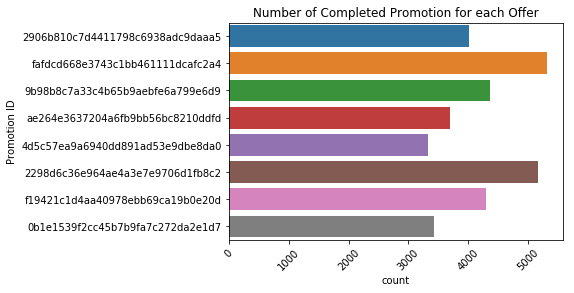

In [28]:

# We we check the completed orders only# We we  

completed_off_count = transcript[transcript['event'] == 'offer completed']

sns.countplot(y=completed_off_count['offer_id'])
plt.title('Number of Completed Promotion for each Offer')
plt.ylabel('Promotion ID')
plt.xticks(rotation = 45)
plt.show();

In [29]:
def get_offer_type(offer_id):
    '''
    input: offer_id: id of offer
    
    output: offer type
    
    '''
    
    try:
        offer_type = portfolio[portfolio['id'] == offer_id]['offer_type'].values[0]
        return offer_type
    except:
        offer_type = 'NA'
        return offer_type

transcript['offer_type'] = transcript.apply(lambda x: get_offer_type(x['offer_id']), axis=1)

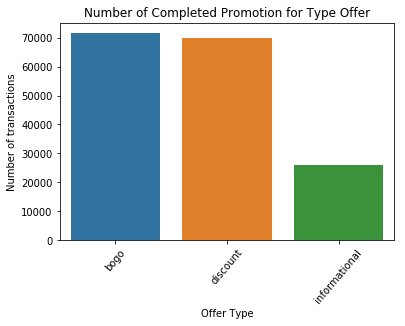

In [30]:
sns.countplot(transcript[transcript['offer_type'] != 'NA']['offer_type'])
plt.title('Number of Completed Promotion for Type Offer')
plt.ylabel('Number of transactions')
plt.xlabel('Offer Type')
plt.xticks(rotation = 50)
plt.show();

What are the most common values for each column in each dataframe?

In [31]:
profile['age_groups'] = pd.cut(profile.age, bins=[0, 12, 18, 21, 64, 200], 
                               labels=['child', 'teen', 'young adult', 'adult', 'elderly'])

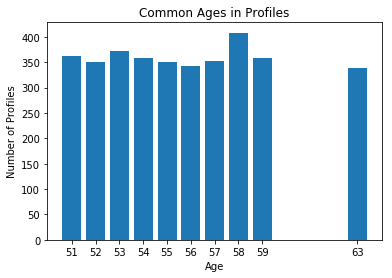

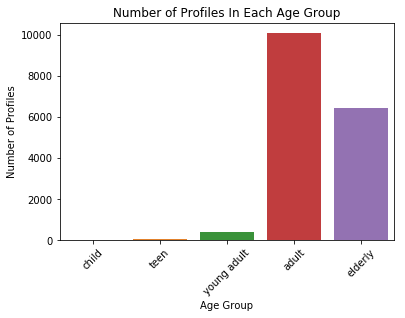

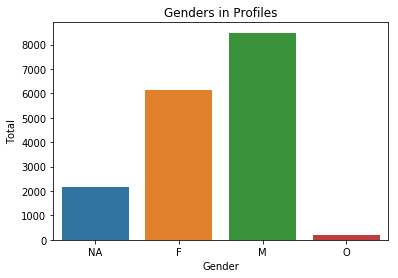

In [32]:
# 118 is an outlier, so it is not included
top10_ages = profile['age'].value_counts()[1:].head(10).reset_index()
plt.bar(top10_ages['index'], top10_ages['age'])
plt.title('Common Ages in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')
plt.xticks(top10_ages['index'], rotation = 0)
plt.show();

sns.countplot(x='age_groups', data=profile)
plt.title('Number of Profiles In Each Age Group')
plt.ylabel('Number of Profiles')
plt.xlabel('Age Group')
plt.xticks(rotation = 45)
plt.show();

sns.countplot(profile['gender'])
plt.title('Genders in Profiles')
plt.ylabel('Total')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

Who are the most loyal customer, in other words most transcripts?

In [33]:
loyal_customer_count = transcript[(transcript['event'] == 'offer completed') | (transcript['event'] == 'transaction')].groupby(['person', 'event'])['amount'].sum().reset_index()
loyal_customer_count = loyal_customer_count.sort_values('amount', ascending=False).head(10)
count = 1

for idx, row in loyal_customer_count.iterrows():
    print(f'.------------------- [ #{count} ] ------------------.')
    print(f'| Profile ID: {row["person"]} |')
    print(f'| Number of Completed Offers:       {completed_off_count[(completed_off_count["person"] == row["person"]) & (completed_off_count["event"] == "offer completed")].shape[0]}          |')
    print(f'| Amount:                         ${row["amount"]}        |')
    print(f"'----------------------------------------------'")
    count += 1

.------------------- [ #1 ] ------------------.
| Profile ID: 3c8d541112a74af99e88abbd0692f00e |
| Number of Completed Offers:       5          |
| Amount:                         $1606        |
'----------------------------------------------'
.------------------- [ #2 ] ------------------.
| Profile ID: f1d65ae63f174b8f80fa063adcaa63b7 |
| Number of Completed Offers:       6          |
| Amount:                         $1360        |
'----------------------------------------------'
.------------------- [ #3 ] ------------------.
| Profile ID: ae6f43089b674728a50b8727252d3305 |
| Number of Completed Offers:       3          |
| Amount:                         $1320        |
'----------------------------------------------'
.------------------- [ #4 ] ------------------.
| Profile ID: 626df8678e2a4953b9098246418c9cfa |
| Number of Completed Offers:       4          |
| Amount:                         $1314        |
'----------------------------------------------'
.------------------- [ #

### 4.1.2) Multvariate Exploration:
1. What is the most common promotion for children, teens, young adult, adult and elderly customors?
2. From profiles, which get more income, males or females?
3. Which type of promotions each gender likes?

In [34]:
#get age group from profile dataframe
def get_customer_age_group(profile_id):
    age_group = profile[profile['id'] == profile_id]['age_groups'].values[0]
    return age_group

transcript['age_group'] = transcript.apply(lambda x: get_customer_age_group(x['person']), axis=1)

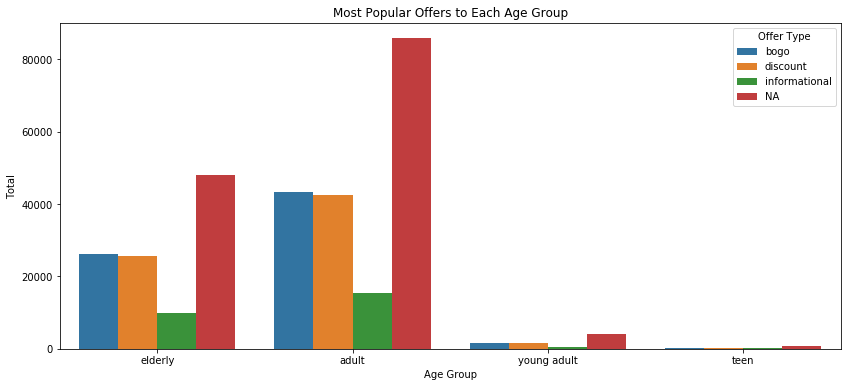

In [35]:
plt.figure(figsize=(14, 6))
sns.countplot(x="age_group", hue="offer_type", data=transcript)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

From profiles dataframe, which get more income: Males, Females, or Other?

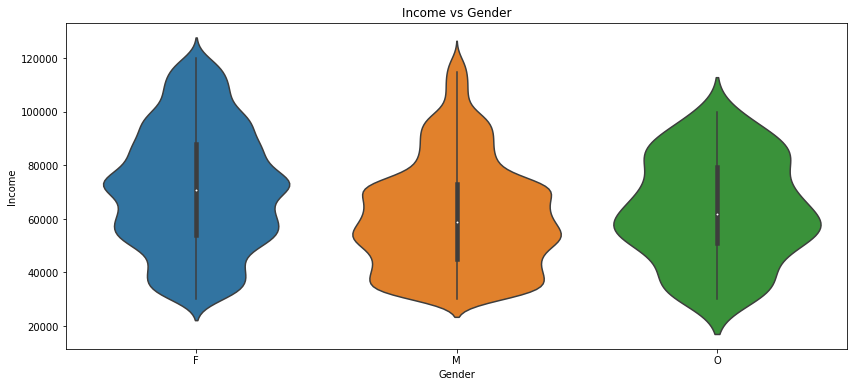

In [36]:
plt.figure(figsize=(14, 6))
sns.violinplot(x=profile[profile['gender'] != 'NA']['gender'], y=profile['income'])
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

Which type of promotions each gender likes?

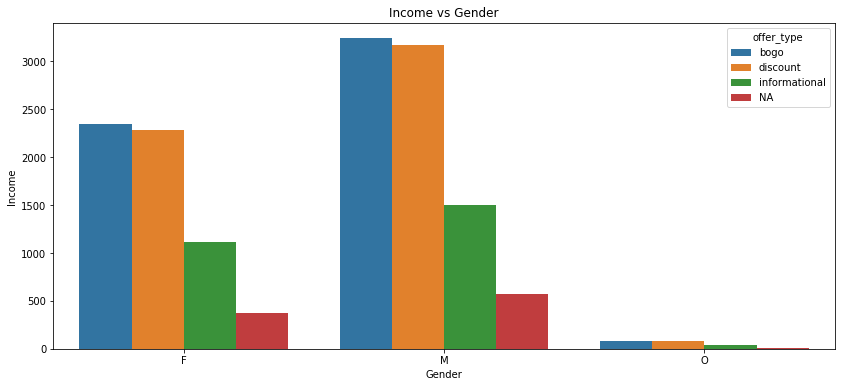

In [37]:
plt.figure(figsize=(14, 6))
sns.countplot(x=profile[profile['gender'] != 'NA']['gender'], hue = 'offer_type', data=transcript)
plt.title('Income vs Gender')
plt.ylabel('Income')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

### 4.2) Modeling Data
In this part, we are going to build a machine learning model that predicts whether or not someone will respond to an offer.

In [38]:
#Because my model will guess the offer_type, I will only get those transcripts with offer id's.
transcript = transcript[transcript['offer_id'] != 'NA']

In [ ]:
def get_customer_gender(profile_id):
    gender = profile[profile['id'] == profile_id]['gender'].values[0]
    return gender

transcript['gender'] = transcript.apply(lambda x: get_customer_gender(x['person']), axis=1)

In [ ]:
def get_customer_income(profile_id):
    income = profile[profile['id'] == profile_id]['income'].values[0]
    return income

transcript['income'] = transcript.apply(lambda x: get_customer_income(x['person']), axis=1)

In [ ]:
transcript.head()

In [ ]:
# Our Features:
# reference: https://www.datacamp.com/community/tutorials/categorical-data
labels_event = transcript['event'].astype('category').cat.categories.tolist()
replace_map_comp_event = {'event' : {k: v for k,v in zip(labels_event,list(range(1,len(labels_event)+1)))}}
print(replace_map_comp_event)

labels_offer_id = transcript['offer_id'].astype('category').cat.categories.tolist()
replace_map_comp_offer_id = {'offer_id' : {k: v for k,v in zip(labels_offer_id,list(range(1,len(labels_offer_id)+1)))}}
print(replace_map_comp_offer_id)

labels_age_group = transcript['age_group'].astype('category').cat.categories.tolist()
replace_map_comp_age_group = {'age_group' : {k: v for k,v in zip(labels_age_group,list(range(1,len(labels_age_group)+1)))}}
print(replace_map_comp_age_group)

labels_gender = transcript['gender'].astype('category').cat.categories.tolist()
replace_map_comp_gender = {'gender' : {k: v for k,v in zip(labels_gender,list(range(1,len(labels_gender)+1)))}}
print(replace_map_comp_gender)

In [ ]:
#Out Target:
labels_offer_type = transcript['offer_type'].astype('category').cat.categories.tolist()
replace_map_comp_offer_type = {'offer_type' : {k: v for k,v in zip(labels_offer_type,list(range(1,len(labels_offer_type)+1)))}}
print(replace_map_comp_offer_type)

In [ ]:
# replace categorical with numerical
transcript.replace(replace_map_comp_event, inplace=True)
transcript.replace(replace_map_comp_offer_id, inplace=True)
transcript.replace(replace_map_comp_age_group, inplace=True)
transcript.replace(replace_map_comp_gender, inplace=True)

transcript.replace(replace_map_comp_offer_type, inplace=True)

In [ ]:
transcript.head()

In [ ]:
# Split the data into features and target label
target = transcript['offer_type']
features = transcript.drop(['person', 'offer_type'], axis = 1)

In [ ]:
target.head()

In [ ]:
features.head()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
to_normalize = ['time', 'amount', 'reward', 'income']

features[to_normalize] = scaler.fit_transform(features[to_normalize])
features.head()

### Creating training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

### Metrics
Since we have a simple classification problem, I will use accuracy to evaluate my models. We want to see how well our model by seeing the number of correct predictions vs total number of predicitons.

Why choose accuracy? First let's define accuracy, the ratio of the correctly labeled subjects to the whole pool of subjects. Also, accuracy answers questions like: How many students did we correctly label out of all the students? It's similar to our situation right? because we want to see how many customers use Starbucks offers. Furthermore, Accuracy = (TP+TN)/(TP+FP+FN+TN). Not to forget, that this is a simple classification problem, so this is my opinion and reasoning on why to use the easiest (accuracy).

## 1. Logistic Regression

In [ ]:
def pred_score(model):
    pred = model.predict(X_test)
    # Calculate the absolute errors
    errors = abs(pred - y_test)
    # Calculate mean absolute percentage error
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    return round(accuracy, 2)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)
print(f'Accuracy of Logistic regression classifier on training set: {round(logreg.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {pred_score(logreg)}%')

## 2. Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print(f'Accuracy of Decision Tree classifier on training set: {round(dt.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {pred_score(dt)}%')

## 3. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
print(f'Accuracy of K-NN classifier on training set: {round(knn.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {pred_score(knn)}%')

## 4.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)
print(f'Accuracy of SVM classifier on training set: {round(rf.score(X_train, y_train)*100,2)}%.')
print(f1_score(y_test, y_pred, average="macro"))

## 5. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)
print(f'Accuracy of SVM classifier on training set: {round(svm.score(X_train, y_train)*100,2)}%.')
print(f'Prediction Accuracy: {pred_score(svm)}%')

## 6. Naive Bayes

In [ ]:

fromfrom  sklearn.naive_bayessklearn.  import GaussianNB 

gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
print(f'Accuracy of SVM classifier on training set: {round(gnb.score(X_train, y_train)*100,2)}%.')
print(f1_score(y_test, y_pred, average="macro"))

## Models Results

In [ ]:
# reference: https://stackoverflow.com/a/52768022
models = [logreg, knn, dt, svm, rf, gnb]
model_names = [type(n).__name__ for n in models]
tr_accuracy = [x.score(X_train, y_train)*100 for x in models]
pred_accuracy = [pred_score(y) for y in models]

In [ ]:
results = [tr_accuracy, pred_accuracy]
results_df = pd.DataFrame(results, columns = model_names, index=['Training Accuracy', 'Predicting Accuracy']) 
results_df



## Model Improvements

In [ ]:
# Tuning to get better accuracy
dual = [True, False]
max_iter = [100, 120, 140, 160, 180, 200, 220]
C = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]
param_grid = dict(dual = dual, max_iter = max_iter, C = C)

lr = LogisticRegression(random_state=42)
grid = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

print(f'Best Score: {grid_result.best_score_}')
print(f'Best params: {grid_result.best_params_}')

### Conclusion
In this project, I tried to analyze and make model to predict the best offer to give a Starbucks customer. First I explored the data and see what I have to change before start the analysis. Then I did some exploratory analysis on the data after cleaning. In conclusion, the company should give more offers to Females than Males since they have more completed offers. And they should focus more on BOGO and Discount offers since they are the one that tend to make customers buy more

### Improvements
I think I got to a point where I had good results and a good understanding of the data. But to make our results even better, I would try to improve my data collection and fix issues I have with NaN values. I will also try to get even more data like location and when the transaction were completed, which branch and what time of the day. All these data can help us know when and where to give our offers.